# Kaggle - Porte Seguro Safe Driver Prediction - Perfomance Improvement 1
**Author: Chris Shin**

In this notebook, we are going to try to improve our baseline model by performing additional feature engineering and model optimization

# Additional Feature Engineering

We use all the given features. What we can try to make a better model is to think about derived features that might be helpful to the models.

In [1]:
import pandas as pd
pd.options.display.max_columns = None

train = pd.read_csv('./data/train.csv', index_col='id')
test = pd.read_csv('./data/test.csv', index_col='id')
submission = pd.read_csv('./data/sample_submission.csv', index_col='id')

# Back to EDA

In [2]:
train['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [3]:
ind_data = train[[feature for feature in train.columns if 'ind' in feature]]

In [4]:
ind_data['target'] = train['target']

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_10128\165645741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_data['target'] = train['target']


In [5]:
ind_data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,target
id,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0
9,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0
13,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0
16,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0
17,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0


In [6]:
ind_data[ind_data['target'] == 1]

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,target
id,,,,,,,,,,,,,,,,,,,
28,1,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,1
64,0,1,2,1,0,1,0,0,0,0,0,0,0,0,8,1,0,0,1
84,0,2,0,1,4,1,0,0,0,0,0,0,0,0,8,1,0,0,1
107,2,1,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,1
110,5,2,1,0,0,0,0,1,0,0,0,0,0,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487473,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,1
1487566,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,1
1487716,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,1


In [7]:
ind_bin_cols = [col for col in ind_data.columns if 'bin' in col]
# ind_bin_cols.append('target')

In [8]:
ind_bin_data = ind_data[ind_bin_cols]

In [9]:
ind_bin_data.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin
id,,,,,,,,,,,
7,0,1,0,0,0,0,0,0,0,1,0
9,0,0,1,0,0,0,0,0,0,0,1
13,0,0,1,0,0,0,0,0,1,0,0
16,1,0,0,0,0,0,0,0,1,0,0
17,1,0,0,0,0,0,0,0,1,0,0


In [10]:
ind_bin_data['bin_sum'] = ind_bin_data[ind_bin_cols].sum(axis=1)

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_10128\417865251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_bin_data['bin_sum'] = ind_bin_data[ind_bin_cols].sum(axis=1)


In [11]:
ind_bin_data['target'] = train['target']

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_10128\2019878456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_bin_data['target'] = train['target']


In [12]:
ind_bin_data[ind_bin_data['target'] == 1]

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,bin_sum,target
id,,,,,,,,,,,,,
28,0,1,0,0,0,0,0,0,0,0,1,2,1
64,1,0,0,0,0,0,0,0,1,0,0,2,1
84,1,0,0,0,0,0,0,0,1,0,0,2,1
107,0,0,1,0,0,0,0,0,1,0,0,2,1
110,0,0,1,0,0,0,0,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487473,0,0,1,0,0,0,0,0,0,1,0,2,1
1487566,0,0,1,0,0,0,0,0,0,0,1,2,1
1487716,0,1,0,0,0,0,0,0,0,1,0,2,1


<Axes: xlabel='bin_sum', ylabel='target'>

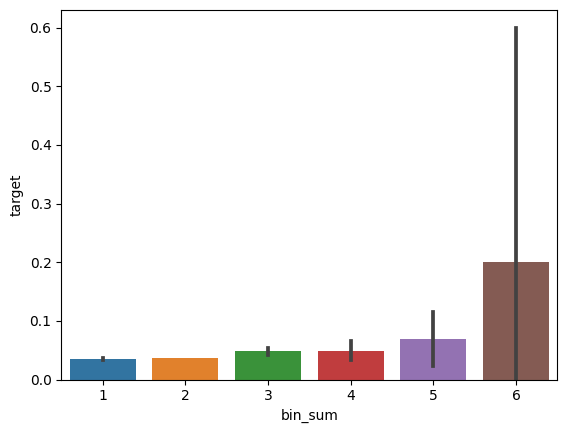

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x='bin_sum', y='target', data=ind_bin_data)

<Axes: xlabel='bin_sum', ylabel='count'>

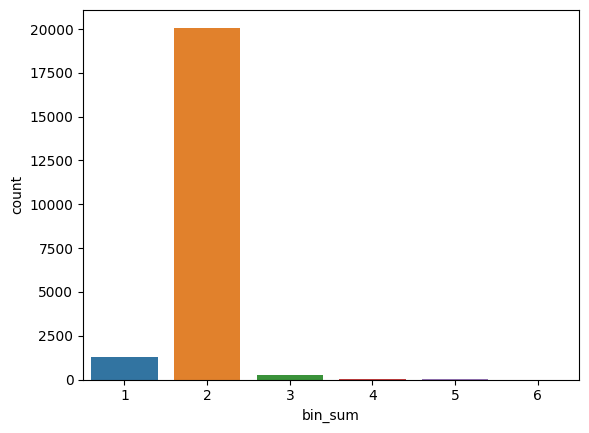

In [14]:
sns.countplot(x='bin_sum', data=ind_bin_data[ind_bin_data['target'] == 1])

<Axes: xlabel='bin_sum', ylabel='count'>

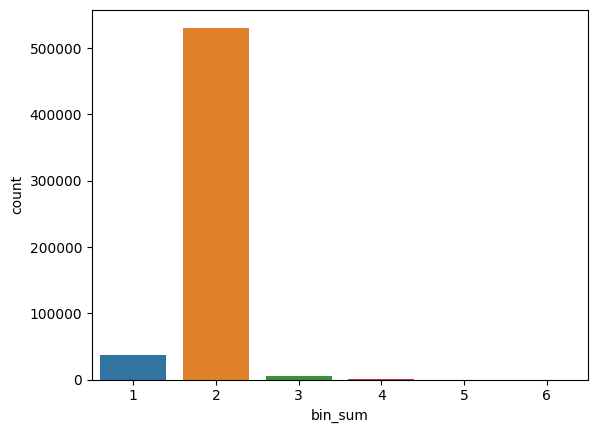

In [15]:
sns.countplot(x='bin_sum', data=ind_bin_data[ind_bin_data['target'] == 0])

In [16]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

all_features = all_data.columns

### Derived Features 

What are the possible additional features that can be helpful?

First for the categorical variable keep current encoding.

In [17]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature] 

onehot_encoder = OneHotEncoder()
encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features]) 

In [18]:
all_data['num_missing'] = (all_data==-1).sum(axis=1)

In [19]:
remaining_features = [feature for feature in all_features
                      if ('cat' not in feature and 'calc' not in feature)] 
remaining_features.append('num_missing')

In [20]:
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

In [21]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

Counting the number of unique values in a categorical feature can be useful in capturing information about the distribution of the feature. In many cases, categorical features with a large number of unique values may be more informative in predicting the target variable than those with a small number of unique values. By creating a new feature that counts the number of occurrences of each unique value, we are essentially adding information about the frequency of each unique value. This can be particularly useful when working with tree-based models, as they can split on these new features to improve the model's performance.

IN the code below, the features are encoded by concatenating the values of certain columns and counting their occurrences. This is a common technique used in feature engineering for categorical variables. By doing so, we can capture combinations of features that might be more informative than each individual feature on its own. This technique can be particularly useful when dealing with high-cardinality categorical variables, where each unique value may only appear a few times in the dataset.

Overall, counting the number of unique values in a categorical feature is a useful technique for feature engineering and can help improve model performance in some cases. However, it may not always be applicable or necessary depending on the specific dataset and modeling task.

In [22]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x: 
                                                           val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

In [23]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

In [24]:
from scipy import sparse
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining),
                               encoded_cat_matrix],
                              format='csr')

In [25]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

In [26]:
import numpy as np

def eval_gini(y_true, y_pred):
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]
    L_mid = np.linspace(1 / n_samples, 1, n_samples)

    pred_order = y_true[y_pred.argsort()]
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) 
    G_pred = np.sum(L_mid - L_pred) 

    true_order = y_true[y_true.argsort()]
    L_true = np.cumsum(true_order) / np.sum(true_order) 
    G_true = np.sum(L_mid - L_true)

    return G_pred / G_true

In [27]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

In [28]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2, 
                                                      random_state=0)

bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [29]:
param_bounds = {'num_leaves': (30, 40),
                'lambda_l1': (0.7, 0.9),
                'lambda_l2': (0.9, 1),
                'feature_fraction': (0.6, 0.7),
                'bagging_fraction': (0.6, 0.9),
                'min_child_samples': (6, 10),
                'min_child_weight': (10, 40)}

fixed_params = {'objective': 'binary',
                'learning_rate': 0.005,
                'bagging_freq': 1,
                'force_row_wise': True,
                'random_state': 1991}

If you are using the Gini coefficient as the evaluation metric, there is no need to use sampling techniques. The Gini coefficient is a ranking-based metric that measures the quality of the ranking of predicted probabilities, and it is not affected by class imbalance. Therefore, you can directly use the original dataset without applying any sampling techniques. However, keep in mind that other evaluation metrics such as accuracy, precision, recall, and F1-score may be affected by class imbalance, so you may need to use sampling techniques if you are optimizing for these metrics.

In [30]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):
    
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    params.update(fixed_params)
    
    print('hyperparameter:', params)    
    
    lgb_model = lgb.train(params=params, 
                           train_set=bayes_dtrain,
                           num_boost_round=2500,
                           valid_sets=bayes_dvalid,
                           feval=gini,
                           early_stopping_rounds=300,
                           verbose_eval=False)

    preds = lgb_model.predict(X_valid) 
    gini_score = eval_gini(y_valid, preds)
    print(f'gini coefficient : {gini_score}\n')
    
    return gini_score

In [31]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)

In [32]:
optimizer.maximize(init_points=3, n_iter=6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
hyperparameter: {'num_leaves': 34, 'lambda_l1': 0.8205526752143287, 'lambda_l2': 0.9544883182996897, 'feature_fraction': 0.6715189366372419, 'bagging_fraction': 0.7646440511781974, 'min_child_samples': 8, 'min_child_weight': 29.376823391999682, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}


c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini coefficient : 0.2855811556220905

| 1         | 0.2856    | 0.7646    | 0.6715    | 0.8206    | 0.9545    | 7.695     | 29.38     | 34.38     |
hyperparameter: {'num_leaves': 39, 'lambda_l1': 0.7766883037651555, 'lambda_l2': 0.9791725038082665, 'feature_fraction': 0.6963662760501029, 'bagging_fraction': 0.867531900234624, 'min_child_samples': 8, 'min_child_weight': 27.04133683281797, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number o

c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


gini coefficient : 0.2828993761731121

| 4         | 0.2829    | 0.8978    | 0.6594    | 0.8445    | 0.9234    | 8.619     | 10.55     | 30.09     |
hyperparameter: {'num_leaves': 37, 'lambda_l1': 0.7738449330497988, 'lambda_l2': 0.9032695189818599, 'feature_fraction': 0.6606341064409726, 'bagging_fraction': 0.7666713964943057, 'min_child_samples': 9, 'min_child_weight': 29.306172421380474, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091


c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


gini coefficient : 0.28513273331754563

| 5         | 0.2851    | 0.7667    | 0.6606    | 0.7738    | 0.9033    | 8.769     | 29.31     | 36.6      |
hyperparameter: {'num_leaves': 33, 'lambda_l1': 0.8268138957114485, 'lambda_l2': 0.9, 'feature_fraction': 0.6126817698209742, 'bagging_fraction': 0.6626247133728974, 'min_child_samples': 10, 'min_child_weight': 35.87746477712849, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini coefficient : 0.2858318138927059

| 6         | 0.2858    | 0.6626    | 0.6127    | 0.8268    | 0.9       | 9.762     | 35.88     | 32.8      |
hyperparameter: {'num_leaves': 36, 'lambda_l1': 0.7, 'lambda_l2': 0.9, 'feature_fraction': 0.7, 'bagging_fraction': 0.6, 'min_child_samples': 6, 'min_child_weight': 40.0, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini coefficient : 0.2848613395033384

| 7         | 0.2849    | 0.6       | 0.7       | 0.7       | 0.9       | 6.0       | 40.0      | 35.9      |
hyperparameter: {'num_leaves': 30, 'lambda_l1': 0.7, 'lambda_l2': 0.9, 'feature_fraction': 0.6, 'bagging_fraction': 0.6, 'min_child_samples': 10, 'min_child_weight': 30.859861883442534, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini coefficient : 0.2849533150638962

| 8         | 0.285     | 0.6       | 0.6       | 0.7       | 0.9       | 10.0      | 30.86     | 30.0      |
hyperparameter: {'num_leaves': 35, 'lambda_l1': 0.9, 'lambda_l2': 1.0, 'feature_fraction': 0.7, 'bagging_fraction': 0.9, 'min_child_samples': 6, 'min_child_weight': 33.74253635491814, 'feature_pre_filter': False, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 1991}
[LightGBM] [Info] Number of positive: 17383, number of negative: 458786


c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036506 -> initscore=-3.273091
[LightGBM] [Info] Start training from score -3.273091
gini coefficient : 0.28429416092349136

| 9         | 0.2843    | 0.9       | 0.7       | 0.9       | 1.0       | 6.0       | 33.74     | 35.4      |


In [33]:
max_params = optimizer.max['params']
max_params

{'bagging_fraction': 0.6626247133728974,
 'feature_fraction': 0.6126817698209742,
 'lambda_l1': 0.8268138957114485,
 'lambda_l2': 0.9,
 'min_child_samples': 9.761611657760122,
 'min_child_weight': 35.87746477712849,
 'num_leaves': 32.800739086810694}

In [34]:
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))

In [35]:
max_params.update(fixed_params)

In [36]:
max_params

{'bagging_fraction': 0.6626247133728974,
 'feature_fraction': 0.6126817698209742,
 'lambda_l1': 0.8268138957114485,
 'lambda_l2': 0.9,
 'min_child_samples': 10,
 'min_child_weight': 35.87746477712849,
 'num_leaves': 33,
 'objective': 'binary',
 'learning_rate': 0.005,
 'bagging_freq': 1,
 'force_row_wise': True,
 'random_state': 1991}

In [37]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

oof_val_preds = np.zeros(X.shape[0]) 
oof_test_preds = np.zeros(X_test.shape[0]) 

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print('#'*40, f'fold {idx+1} / fold {folds.n_splits}', '#'*40)
    
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx] 

    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
                          
    lgb_model = lgb.train(params=max_params,
                          train_set=dtrain,
                          num_boost_round=2500,
                          valid_sets=dvalid,
                          feval=gini, 
                          early_stopping_rounds=300, 
                          verbose_eval=100)
    
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'fold {idx+1} gini coefficient : {gini_score}\n')

######################################## fold 1 / fold 5 ########################################


c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Yuchie\Desktop\DataScience\kaggle_env\Lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 216
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
[100]	valid_0's binary_logloss: 0.154293	valid_0's gini: 0.268452
[200]	valid_0's binary_logloss: 0.153249	valid_0's gini: 0.273856
[300]	valid_0's binary_logloss: 0.15265	valid_0's gini: 0.278185
[400]	valid_0's binary_logloss: 0.15229	valid_0's gini: 0.281623
[500]	valid_0's binary_logloss: 0.152051	valid_0's gini: 0.284844
[600]	valid_0's binary_logloss: 0.151891	valid_0's gini: 0.287294
[700]	valid_0's binary_logloss: 0.151783	valid_0's gini: 0.289035
[800]	valid_0's binary_logloss: 0.151694	valid_0's gini: 0.290689
[900]	valid_0's binary_logloss: 0.151618	valid_0's gini: 0.292327
[1000]	vali

In [38]:
print('OOF validation prediction gini coefficient:', eval_gini(y, oof_val_preds))

OOF validation prediction gini coefficient: 0.2888026261834394


In [39]:
submission['target'] = oof_test_preds
submission.to_csv('submission.csv')